In [2]:
# test.csv - train.csv랑 같은 형식. test.csv랑 train.csv의 store_id가 같아도 같은 상점인 것은 아님.
# (월에 최소 5일 이상 데이터가 있는 상점만을 문제에 포함.)

In [3]:
import pandas as pd
import numpy as np

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

In [4]:
test = pd.read_csv("data/test_pos.csv")
test.date = pd.to_datetime(test['date'])

In [5]:
data = test.groupby(['store_id', 'date'])[['amount']].sum()
store_names = data.index.get_level_values('store_id').unique()

In [6]:
test.date.max()

Timestamp('2018-03-31 00:00:00')

In [7]:
# last day: 2018-03-31
# 각 가게들의 마지막 open날짜와 예측해야할 날짜로부터의 날짜 계산

last_day = dt.datetime(2018,3,31)
interval = dt.timedelta(days=14)

temp =[]

for store_name in store_names:
    temp.append(last_day - data.loc[store_name].index[-1])
    
temp = pd.DataFrame(temp)
temp.iloc[:,0].value_counts()

# 73일은 폐업 또는 영업정지로 예상
# store_id: 197

0 days     148
1 days      25
2 days       8
3 days       6
5 days       4
4 days       4
8 days       2
10 days      1
73 days      1
7 days       1
Name: 0, dtype: int64

### 마지막 날짜로 부터 73일 차이: store_id = 197

In [8]:
# store_id: 197

temp = test[test['store_id']==197]
temp['count'] = 1

temp = temp.groupby('date')[['amount', 'count']].sum()

C:\Users\lonj7\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


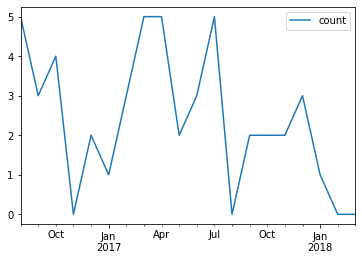

In [9]:
# store_id: 197의 월별 매출 건 수

all_times = pd.date_range(test.date.min(),
                          test.date.max(), freq = "D")
temp = temp.reindex(all_times, fill_value=0)
temp.resample('M')[['count']].sum().plot()

#  (월에 최소 5일 이상 데이터가 있는 상점만을 문제에 포함.) -> 월 매출 5회 이하가 다반수.

### rolling vs resample

In [8]:
# rolling vs resample
rolling = data.loc[0].rolling('7D').mean()
resample = data.loc[0].resample('7D').mean()

In [9]:
print("Rolling----")
print(rolling.head())

print("\nResample---")
print(resample.head())

Rolling----
             amount
date               
2016-08-01  2106.00
2016-08-02  1817.00
2016-08-03  1398.00
2016-08-04  1469.25
2016-08-05  1512.60

Resample---
                 amount
date                   
2016-08-01  1550.571429
2016-08-08  1208.142857
2016-08-15  1089.285714
2016-08-22  1254.285714
2016-08-29   930.142857


In [10]:
# test.csv - train.csv랑 같은 형식. test.csv랑 train.csv의 store_id가 같아도 같은 상점인 것은 아님.
# (월에 최소 5일 이상 데이터가 있는 상점만을 문제에 포함.)

In [11]:
"""
def downsampling(data, store_names):
    
    stores_28 = pd.DataFrame(index=[['store_id'],['date']], columns=['amount', 'holyday'])
    stores_14 = pd.DataFrame(index=[['store_id'],['date']], columns=['amount', 'holyday'])
    stores_7 = pd.DataFrame(index=[['store_id'],['date']], columns=['amount', 'holyday'])
    stores_1 = pd.DataFrame(index=[['store_id'],['date']], columns=['amount', 'holyday'])
    
    for name in store_names:
        df = data.loc[name]
        length = len(df)
        
        # 만약 28일 단위 다운샘플링 이후 행의 개수가 10개를 넘어가면 다운샘플링
        if (length/28) > 10:
            df = df.resample('28D').mean()
            df['store_id'] = name
            df = df.groupby(['store_id', 'date']).sum()
        
            stores_28 = stores_28.append(df)
        
        # 만약 14일 단위 다운샘플링 이후 행의 개수가 10개를 넘어가면 다운샘플링
        elif (length/14) > 10:
            df = df.resample('14D').mean()
            df['store_id'] = name
            df = df.groupby(['store_id', 'date']).sum()
        
            stores_14 = stores_14.append(df)
        # 만약 7일 단위 다운샘플링 이후 행의 개수가 10개를 넘어가면 다운샘플링 
        elif (length/7) > 10:
            df = df.resample('7D').mean()
            df['store_id'] = name
            df = df.groupby(['store_id', 'date']).sum()
        
            stores_7 = stores_7.append(df)
        # 혹은 다운샘플링 진행 X
        
        else:
            df['store_id'] = name
            df = df.groupby(['store_id', 'date']).sum()
        
            stores_1 = stores_1.append(df)
        
    return stores_28, stores_14, stores_7, stores_1
"""

"\ndef downsampling(data, store_names):\n    \n    stores_28 = pd.DataFrame(index=[['store_id'],['date']], columns=['amount', 'holyday'])\n    stores_14 = pd.DataFrame(index=[['store_id'],['date']], columns=['amount', 'holyday'])\n    stores_7 = pd.DataFrame(index=[['store_id'],['date']], columns=['amount', 'holyday'])\n    stores_1 = pd.DataFrame(index=[['store_id'],['date']], columns=['amount', 'holyday'])\n    \n    for name in store_names:\n        df = data.loc[name]\n        length = len(df)\n        \n        # 만약 28일 단위 다운샘플링 이후 행의 개수가 10개를 넘어가면 다운샘플링\n        if (length/28) > 10:\n            df = df.resample('28D').mean()\n            df['store_id'] = name\n            df = df.groupby(['store_id', 'date']).sum()\n        \n            stores_28 = stores_28.append(df)\n        \n        # 만약 14일 단위 다운샘플링 이후 행의 개수가 10개를 넘어가면 다운샘플링\n        elif (length/14) > 10:\n            df = df.resample('14D').mean()\n            df['store_id'] = name\n            df = df.groupby(['store_i

In [10]:
def downsampling(data, store_names):
    
    stores_28 = pd.DataFrame(columns=['store_id','date','amount','holyday'])
    stores_14 = pd.DataFrame(columns=['store_id','date','amount','holyday'])
    stores_7 = pd.DataFrame(columns=['store_id','date','amount','holyday'])
    stores_1 = pd.DataFrame(columns=['store_id','date','amount','holyday'])
    
    for name in store_names:
        # df = data.loc[name]
        df = data[data['store_id'] == name].groupby('date')[['amount', 'holyday']].sum()
        length = len(df)
        
        # 만약 28일 단위 다운샘플링 이후 행의 개수가 10개를 넘어가면 다운샘플링
        if (length/28) > 10:
            df = df.resample('28D').mean()
            df['store_id'] = name
        
            stores_28 = stores_28.append(df)
        
        # 만약 14일 단위 다운샘플링 이후 행의 개수가 10개를 넘어가면 다운샘플링
        elif (length/14) > 10:
            df = df.resample('14D').mean()
            df['store_id'] = name
        
            stores_14 = stores_14.append(df)
            
        # 만약 7일 단위 다운샘플링 이후 행의 개수가 10개를 넘어가면 다운샘플링 
        elif (length/7) > 10:
            df = df.resample('7D').mean()
            df['store_id'] = name
        
            stores_7 = stores_7.append(df)
            
        # 혹은 다운샘플링 진행 X
        else:
            df['store_id'] = name
        
            stores_1 = stores_1.append(df)
        
    return stores_28, stores_14, stores_7, stores_1

In [11]:
stores_28days, stores_14days, stores_7days, stores_1day = downsampling(test, store_names)

In [12]:
stores_28days = stores_28days.groupby(['store_id', stores_28days.index]).sum()
stores_14days = stores_14days.groupby(['store_id', stores_14days.index]).sum()
stores_7days = stores_7days.groupby(['store_id', stores_7days.index]).sum()
stores_1day = stores_1day.groupby(['store_id', stores_1day.index]).sum()

In [13]:
print("28일로 나뉜 가게 수:", len(stores_28days.index.get_level_values('store_id').unique()))
print("14일로 나뉜 가게 수:", len(stores_14days.index.get_level_values('store_id').unique()))
print(" 7일로 나뉜 가게 수:", len(stores_7days.index.get_level_values('store_id').unique()))
print(" 1일로 나뉜 가게 수:", len(stores_1day.index.get_level_values('store_id').unique()))

28일로 나뉜 가게 수: 120
14일로 나뉜 가게 수: 38
 7일로 나뉜 가게 수: 29
 1일로 나뉜 가게 수: 13


### log X,
- p,d,q 0~1

In [14]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
     # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        rmse = math.sqrt(mse)
                        best_score, best_cfg = rmse, order
                    # print('ARIMA%s RMSE=%.5f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.5f' % (best_cfg, best_score))

In [17]:
# evaluate parameters
p_values = range(0,2)
d_values = range(0,2)
q_values = range(0,2)
warnings.filterwarnings("ignore")

In [34]:
for i in stores_28days.index.get_level_values('store_id').unique():
    print("store_id:",i)
    evaluate_models(stores_28days.loc[i][['amount']].values, p_values, d_values, q_values)

store_id: 0
Best ARIMA(0, 0, 0) RMSE=77.50905
store_id: 1
Best ARIMA(0, 0, 0) RMSE=615.91046
store_id: 2
Best ARIMA(0, 0, 0) RMSE=278.26866
store_id: 3
Best ARIMA(0, 0, 0) RMSE=98.01003
store_id: 4
Best ARIMA(0, 0, 0) RMSE=55.50916
store_id: 5
Best ARIMA(0, 0, 0) RMSE=50.95566
store_id: 6
Best ARIMA(0, 0, 0) RMSE=256.08428
store_id: 10
Best ARIMA(0, 0, 0) RMSE=203.87905
store_id: 12
Best ARIMA(0, 0, 0) RMSE=13.89863
store_id: 13
Best ARIMA(0, 0, 0) RMSE=165.81270
store_id: 14
Best ARIMA(0, 0, 0) RMSE=232.25537
store_id: 15
Best ARIMA(0, 0, 0) RMSE=78.89835
store_id: 17
Best ARIMA(0, 0, 0) RMSE=15.76774
store_id: 18
Best ARIMA(0, 0, 0) RMSE=587.15833
store_id: 19
Best ARIMA(0, 0, 0) RMSE=43.08075
store_id: 20
Best ARIMA(0, 0, 0) RMSE=196.15278
store_id: 22
Best ARIMA(0, 0, 0) RMSE=199.09818
store_id: 24
Best ARIMA(0, 0, 0) RMSE=66.18959
store_id: 30
Best ARIMA(0, 0, 0) RMSE=171.80899
store_id: 31
Best ARIMA(0, 0, 0) RMSE=86.90128
store_id: 33
Best ARIMA(0, 0, 0) RMSE=247.75901
store_id:

C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 4W-MON will be used.
  % freq, ValueWarning)


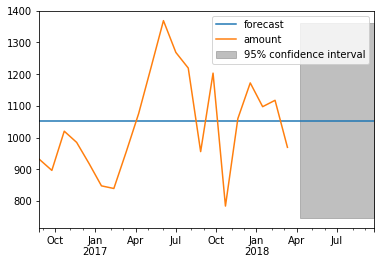

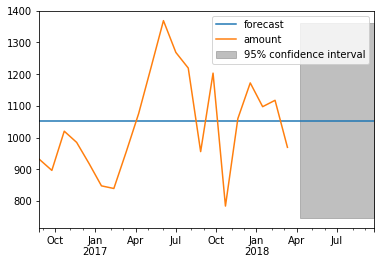

In [28]:
model = ARIMA(stores_28days.loc[0].amount, order=(0,0,0))
results_ARIMA = model.fit(disp=-1)
fcst = results_ARIMA.forecast(10)
results_ARIMA.plot_predict(start=1, end=28)

In [150]:
fcst_means = fcst[0]

In [155]:
fcst
# fcst[0]: mean
# fcst[1]: std
# fcst[2]: min max

(array([954.76802721, 940.18605442, 925.60408163, 911.02210884,
        896.44013605, 881.85816327, 867.27619048, 852.69421769,
        838.1122449 , 823.53027211]),
 array([175.63381919, 248.38372911, 304.20669837, 351.26763838,
        392.72915886, 430.21323859, 464.68340739, 496.76745822,
        526.90145757, 555.4029028 ]),
 array([[ 610.53206713, 1299.00398729],
        [ 453.36289102, 1427.00921782],
        [ 329.36990898, 1521.83825428],
        [ 222.55018868, 1599.494029  ],
        [ 126.70512901, 1666.17514309],
        [  38.65570995, 1725.06061658],
        [ -43.48655222, 1778.03893317],
        [-120.95210912, 1826.34054449],
        [-194.59563534, 1870.82012514],
        [-265.03941428, 1912.0999585 ]]))

In [21]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(stores_28days.loc[0].amount, results_ARIMA.predict(start=1,end=22)))
print("RMSE:", rmse)

RMSE: 157.31076444718178


In [22]:
submission = pd.read_csv("../../Data/Price prediction/submission.csv")
submission_no_log = submission.copy()

def forecast_arima(data, predict_days):
    names = data.index.get_level_values("store_id").unique()
    
    for store_i in names:
        
        model = ARIMA(data.loc[store_i].amount, order=(0,0,0))
        results_ARIMA = model.fit(disp=-1)
        
        if predict_days == 28:
            fcst = results_ARIMA.forecast(4)
        elif predict_days == 14:
            fcst = results_ARIMA.forecast(7)
        elif predict_days == 7:
            fcst = results_ARIMA.forecast(14)
        elif predict_days == 1:
            fcst = results_ARIMA.forecast(100)
        
        prediction = fcst[0].sum()
        submission_no_log.loc[submission_no_log['store_id'] == store_i, 'total_sales'] = prediction

In [23]:
forecast_arima(stores_28days, 28)
forecast_arima(stores_14days, 14)
forecast_arima(stores_7days, 7)

stores_1day.amount = stores_1day.amount.astype(float)
forecast_arima(stores_1day, 1)

C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 4W-MON will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 4W-WED will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 4W-MON will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 4W-MON will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 4W-MON will be used.
  % freq, Valu

C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 4W-MON will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 4W-MON will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 4W-TUE will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 4W-MON will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 4W-MON will be used.
  % freq, Valu

C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 2W-MON will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 2W-SAT will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 2W-FRI will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 2W-MON will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 2W-SAT will be used.
  % freq, Valu

In [25]:
submission_no_log[submission_no_log['total_sales'] < 0].total_sales = 0

In [26]:
submission_no_log.to_csv("submission_no_log_000.csv", index=False)
# 최종 결과: 140000

### log

In [25]:
# log를 취했을때 inf가 되는 곳이 있는지 확인:
print("28days-------------------")
print(stores_28days[stores_28days['amount']==0])
print("14days-------------------")
print(stores_14days[stores_14days['amount']==0])
print("7days-------------------")
print(stores_7days[stores_7days['amount']==0])
print("1day-------------------")
print(stores_1day[stores_1day['amount']==0])

28days-------------------
                     amount  holyday
store_id                            
18       2017-07-11     0.0      0.0
14days-------------------
                     amount  holyday
store_id                            
138      2017-06-22     0.0      0.0
162      2016-12-21     0.0      0.0
         2017-01-04     0.0      0.0
         2017-11-08     0.0      0.0
         2018-01-03     0.0      0.0
175      2016-10-10     0.0      0.0
         2017-01-02     0.0      0.0
         2017-03-13     0.0      0.0
         2018-01-15     0.0      0.0
181      2016-10-14     0.0      0.0
         2016-10-28     0.0      0.0
198      2017-09-14     0.0      0.0
7days-------------------
                     amount  holyday
store_id                            
7        2017-11-25     0.0      0.0
         2018-03-03     0.0      0.0
25       2018-01-06     0.0      0.0
         2018-01-13     0.0      0.0
         2018-01-27     0.0      0.0
...                     ...      ..

In [49]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
import seaborn as sns
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import scipy.stats as st
from datetime import datetime, timedelta

In [51]:
def get_optimal_params(y):
    # Define the p, d and q parameters to take any value between 0 and 1

    param_dict = {}
    for param in pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            )
            results = mod.fit()
            model = ARIMA(y, order=param)
            results_ARIMA = model.fit(disp=-1)
            results_ARIMA.summary()
            param_dict[results.aic] = param
        except:
            continue

    min_aic = min(param_dict.keys())
    optimal_params = param_dict[min_aic]
    return optimal_params

In [52]:
max_pdq = 2
p = d = q = range(0, max_pdq)
pdq = list(itertools.product(p, d, q))


pdqs = dict()

In [53]:
# 원본에서는 resample하기 전에 porb_of_no_sales를 만든다.

In [57]:
# fcst_period = forcast period

def arima_main(input_df, sampling_period_days, fcst_period):
    prob_of_no_sales = len(input_df[(input_df.amount == 0) | (input_df.amount.isna())]) / len(input_df)
    ts_log = np.log(input_df.amount)
    ts_log = ts_log[~ts_log.isin([np.nan, np.inf, -np.inf])]
    
    if sampling_period_days == 28:
        expected_return_pct_lending = 0.13 * (100 + 16 + 6.8) / 365
    elif sampling_period_days == 14:
        expected_return_pct_lending = 0.13 * (100 + 16 + 14) / 365
    else:
        expected_return_pct_lending == 0.13 * (100 + 16 + 6.8) / 365
    
    
    expected_loss_pct_lending = 1.00
    optimal_prob = expected_loss_pct_lending / (expected_loss_pct_lending + expected_return_pct_lending)
    optimal_z_score = st.norm.ppf(optimal_prob)

    optimal_params = get_optimal_params(ts_log)
    pdqs[store_i] = optimal_params    # store_i = store_id

    model = ARIMA(ts_log, order=optimal_params)
    results_ARIMA = model.fit(disp=-1)
    fcst = results_ARIMA.forecast(fcst_period)

    fcst_means = fcst[0]
    fcst_stds = fcst[1]
    fcst_i = fcst_means - (fcst_stds * optimal_z_score)
    fcst_i = sum(map(lambda x: np.exp(x) if np.exp(x) > 0 else 0, fcst_i))
    prediction_i = fcst_i * (1 - prob_of_no_sales)
    return prediction_i

In [65]:
submission = pd.read_csv("../../Data/Price prediction/submission.csv")

In [66]:
submission_copy = submission.copy()

In [67]:
for store_i in stores_28days.index.get_level_values('store_id').unique():
    prediction_i = arima_main(stores_28days, sampling_period_days=28, fcst_period=3)
    submission_copy.loc[submission_copy['store_id'] == store_i, 'total_sales'] = prediction_i

In [69]:
for store_i in stores_14days.index.get_level_values('store_id').unique():
    prediction_i = arima_main(stores_14days, sampling_period_days=14, fcst_period=7)
    submission_copy.loc[submission_copy['store_id'] == store_i, 'total_sales'] = prediction_i

In [70]:
for store_i in stores_7days.index.get_level_values('store_id').unique():
    prediction_i = arima_main(stores_7days, sampling_period_days=7, fcst_period=12)
    submission_copy.loc[submission_copy['store_id'] == store_i, 'total_sales'] = prediction_i

UnboundLocalError: local variable 'expected_return_pct_lending' referenced before assignment

In [ ]:
for store_i in stores_1day.index.get_level_values('store_id').unique():
    test_df = test_df_daily[len(test_df_daily) % 14:].resample('14D').sum()

    prob_of_no_sales = len(test_df[(test_df.amount == 0) | (test_df.amount.isna())]) / len(test_df)
    ts_log = ts_log[~ts_log.isin([np.nan, np.inf, -np.inf])]
    ts_log_wkly = np.log(test_df.amount)

    estimated_amt = np.exp(ts_log_wkly.mean() - ts_log_wkly.std() * optimal_z_score) * (1 - prob_of_no_sales)
    prediction_i = estimated_amt * mean_period